In [7]:
import os
import sys
import importlib
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA
import math
import pylab

# pyaldata
sys.path.append("/home/zms24/Desktop") 
import PyalData.pyaldata as pyal # type:ignore

# tools functions
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from tools.curbd import curbd
from tools.dsp.preprocessing import preprocess
from tools.rnn_and_curbd import rnn as rnnz
from tools.rnn_and_curbd import plotting as pltz
from tools.rnn_and_curbd import model_analysis as analyz
from tools.rnn_and_curbd import curbd as curbdz

# Reload modules
importlib.reload(rnnz)
importlib.reload(pltz)
importlib.reload(analyz)
importlib.reload(curbdz)

np.random.seed(61)

## Load in RNN models and df

In [2]:
fname0 = 'rnn_model_M061_2025_03_04_10_00.mat'
fname1 = 'rnn_model_M061_2025_03_06_14_00.mat'
path0 = os.path.join("/home/zms24/Desktop/rnn_models/", fname0)
path1 = os.path.join("/home/zms24/Desktop/rnn_models/", fname1)

data0 = loadmat(path0, simplify_cells=True)
data1 = loadmat(path1, simplify_cells=True)
rnn_model0 = data0['rnn_model']
rnn_model1 = data1['rnn_model']

In [3]:
pyal_dict0 = rnnz.process_pyal_M061_M062_files(fname0, rnn_model0)
pyal_dict1 = rnnz.process_pyal_M061_M062_files(fname1, rnn_model1)

field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to int.
field idx_Sol_duration could not be converted to int.
field idx_sol_on could not be converted to int.
array field SSp_ul_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field Thal_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
field idx_motion could not be converted to int.
array field SSp_ul_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field Thal_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to 

/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


Combined every 3 bins
Resulting SSp_ul_spikes ephys data shape is (NxT): (59, 200)
Resulting Thal_spikes ephys data shape is (NxT): (240, 200)
Resulting MOp_spikes ephys data shape is (NxT): (206, 200)
Resulting CP_spikes ephys data shape is (NxT): (356, 200)
Trial length: 200
field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field GPe_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converte

/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_X might be a time-varying field. It matches the length of SSp_spikes on 99.85052316890882% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_X might be a time-varying field. It matches the length of SSp_spikes on 99.85052316890882% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_Y might be a time-varying field. It matches the length of SSp_spikes on 99.85052316890882% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_Y might be a time-varying field. It matches the length of SSp_spikes on 99.85052316890882% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108

Combined every 3 bins
Resulting SSp_spikes ephys data shape is (NxT): (69, 200)
Resulting VAL_spikes ephys data shape is (NxT): (168, 200)
Resulting MOp_spikes ephys data shape is (NxT): (178, 200)
Resulting CP_spikes ephys data shape is (NxT): (172, 200)
Resulting GPe_spikes ephys data shape is (NxT): (120, 200)
Trial length: 200


In [4]:
arr = pyal_dict1['regions_arr']
filtered_arr = arr[arr[:, 0] != 'GPe']
pyal_dict1['regions_arr'] = filtered_arr

#### metadata

In [10]:
BIN_SIZE =  rnn_model0['dtData']

# CURBD

In [18]:
import matplotlib.colors as mcolors
def blend_colors(source_hex, target_hex, source_weight=0.6):
    """Blend two hex colors, source-dominant."""
    source_rgb = mcolors.to_rgb(source_hex)
    target_rgb = mcolors.to_rgb(target_hex)

    blended_rgb = tuple(
        source_weight * s + (1 - source_weight) * t
        for s, t in zip(source_rgb, target_rgb)
    )
    return mcolors.to_hex(blended_rgb)

def generate_directional_colors(area_colors, source_weight=0.6):
    curbd_colors = {}
    areas = [k for k in area_colors if k != 'all']  # exclude 'all'

    for source in areas:
        for target in areas:
            key = f'{source} to {target}'
            source_color = area_colors[source]
            target_color = area_colors[target]
            blended = blend_colors(source_color, target_color, source_weight)
            curbd_colors[key] = blended

    return curbd_colors

In [19]:
brain_area_colors = {
    'MOp': "#3681D2",
    'SSp': "#ff9d4d",
    'CP': "#8ed74d",
    'Thal': '#e76f51',
    'all': '#bbbbbb'
}

curbd_colors = generate_directional_colors(brain_area_colors)

In [20]:
curbd_arr0, curbd_labels0 = curbd.computeCURBD(rnn_model0)
n_regions0 = curbd_arr0.shape[0]
currents0, current_labels0 = curbdz.format_curbd_output(curbd_arr0, curbd_labels0, n_regions0, pyal_dict0['reset_points'])

In [33]:
def plot_currents_by_region(all_currents, all_currents_labels, perturbation_time, curbd_colours, bin_size, dtFactor, mouse_num):
    n = len(all_currents)
    n_regions = int(math.sqrt(n))
    assert n_regions ** 2 == n, "Number of plots must be a perfect square"

    fig, axes = plt.subplots(n_regions, n_regions, figsize=(10, 8), sharex=True, sharey=True)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    global_min, global_max = float('inf'), float('-inf')
    mean_sem_data = []

    # First pass: compute global y-limits
    for current_data in all_currents:
        current_data = np.array(current_data)
        mean_current = np.mean(current_data, axis=(0, 1))
        sem_current = np.std(current_data, axis=(0, 1)) / np.sqrt(current_data.shape[0] * current_data.shape[1])

        y_lower = np.min(mean_current - sem_current)
        y_upper = np.max(mean_current + sem_current)

        global_min = min(global_min, y_lower)
        global_max = max(global_max, y_upper)

        mean_sem_data.append((mean_current, sem_current))

    # Second pass: plot each
    for i in range(n):
        row, col = divmod(i, n_regions)
        ax = axes[row, col]

        current_label = all_currents_labels[i]
        colour = curbd_colours.get(current_label, f'C{i % 10}')

        current_data = np.array(all_currents[i])
        mean_current, sem_current = mean_sem_data[i]
        time_axis = np.linspace(0, (current_data.shape[2] * bin_size) / dtFactor, current_data.shape[2])

        ax.plot(time_axis, mean_current, linewidth=2, color=colour)
        ax.fill_between(time_axis, mean_current - sem_current, mean_current + sem_current, alpha=0.3, color=colour)
        ax.axvline(perturbation_time, color='red', linestyle='--', linewidth=1)

        ax.set_title(current_label, fontsize='large')

        # Only label outer plots
        if row == n_regions - 1:
            ax.set_xlabel('Time (s)', fontsize='large')
        if col == 0:
            ax.set_ylabel('Current Strength', fontsize='large')

        ax.set_ylim(global_min, global_max)

    fig.suptitle(f'Average current across all trials - Session {mouse_num}', fontsize='x-large')
    fig.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

    return fig


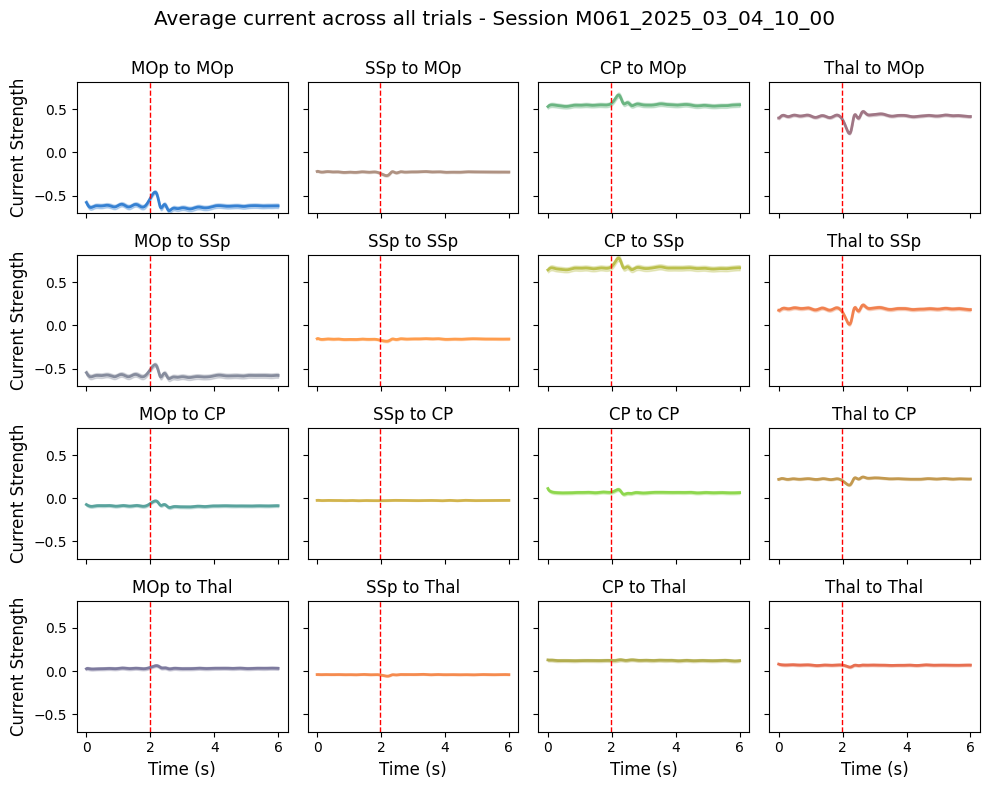

In [34]:
currents_fig = plot_currents_by_region(currents0, current_labels0, pyal_dict0['perturbation_time_sec'], curbd_colors, BIN_SIZE, rnn_model0['params']['dtFactor'], 'M061_2025_03_04_10_00')

In [53]:
def plot_pca_currents(all_currents, all_currents_labels, perturbation_time, curbd_colors, mouse_num, fig_size = None):
    if fig_size != None:
        fig = pylab.figure(figsize=fig_size)
    else:
        fig = pylab.figure(figsize=(10, 12))
    
    count = 1
    n_regions = int(math.sqrt(len(all_currents)))
    colours = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

    for i in range(len(all_currents)):
        current_data = np.array(all_currents[i])
        current_label = all_currents_labels[i]
        colour = curbd_colors.get(current_label, colours[i % len(colours)])

        axn = fig.add_subplot(n_regions, n_regions, count, projection='3d')
        count += 1

        mean_current = np.mean(current_data, axis=1).T # keep neuron dimension, but mean across trials

        pca = PCA(n_components=min(mean_current.shape[0], mean_current.shape[1]))
        pca_current = pca.fit_transform(mean_current)

        axn.plot(pca_current[:, 0],
                 pca_current[:, 1],
                 pca_current[:, 2], color=colour)
        axn.scatter(
            pca_current[perturbation_time, 0],
            pca_current[perturbation_time, 1],
            pca_current[perturbation_time, 2],
            color='red',
            s=50,
            marker='o',
            label = "perturbation"
        )
        axn.scatter(
            pca_current[0, 0],
            pca_current[0, 1],
            pca_current[0, 2],
            color='black',
            s=60,
            marker='x',
            label = "trial start"
        )

        axn.xaxis.pane.fill = False
        axn.yaxis.pane.fill = False
        axn.zaxis.pane.fill = False
        
        # Remove axis ticks
        axn.set_xticks([])
        axn.set_yticks([])
        axn.set_zticks([])

        axn.set_title(f'{current_label}')
        axn.set_xlabel('PC1')
        axn.set_ylabel('PC2')
        axn.set_zlabel('PC3')
        axn.grid(False)
        # Collect handles and labels from the last axes (or choose one representative one)
        handles, labels = axn.get_legend_handles_labels()

        # Add a single legend outside the plot
        fig.legend(
            handles,
            labels,
            loc='center right',
            bbox_to_anchor=(1.15, 0.5)
        )

    fig.suptitle(f'PCA of average current across all trials - Session {mouse_num}', fontsize='xx-large')
    fig.tight_layout()
    fig.show()

    return fig

/tmp/ipykernel_2729688/1768986960.py:73: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


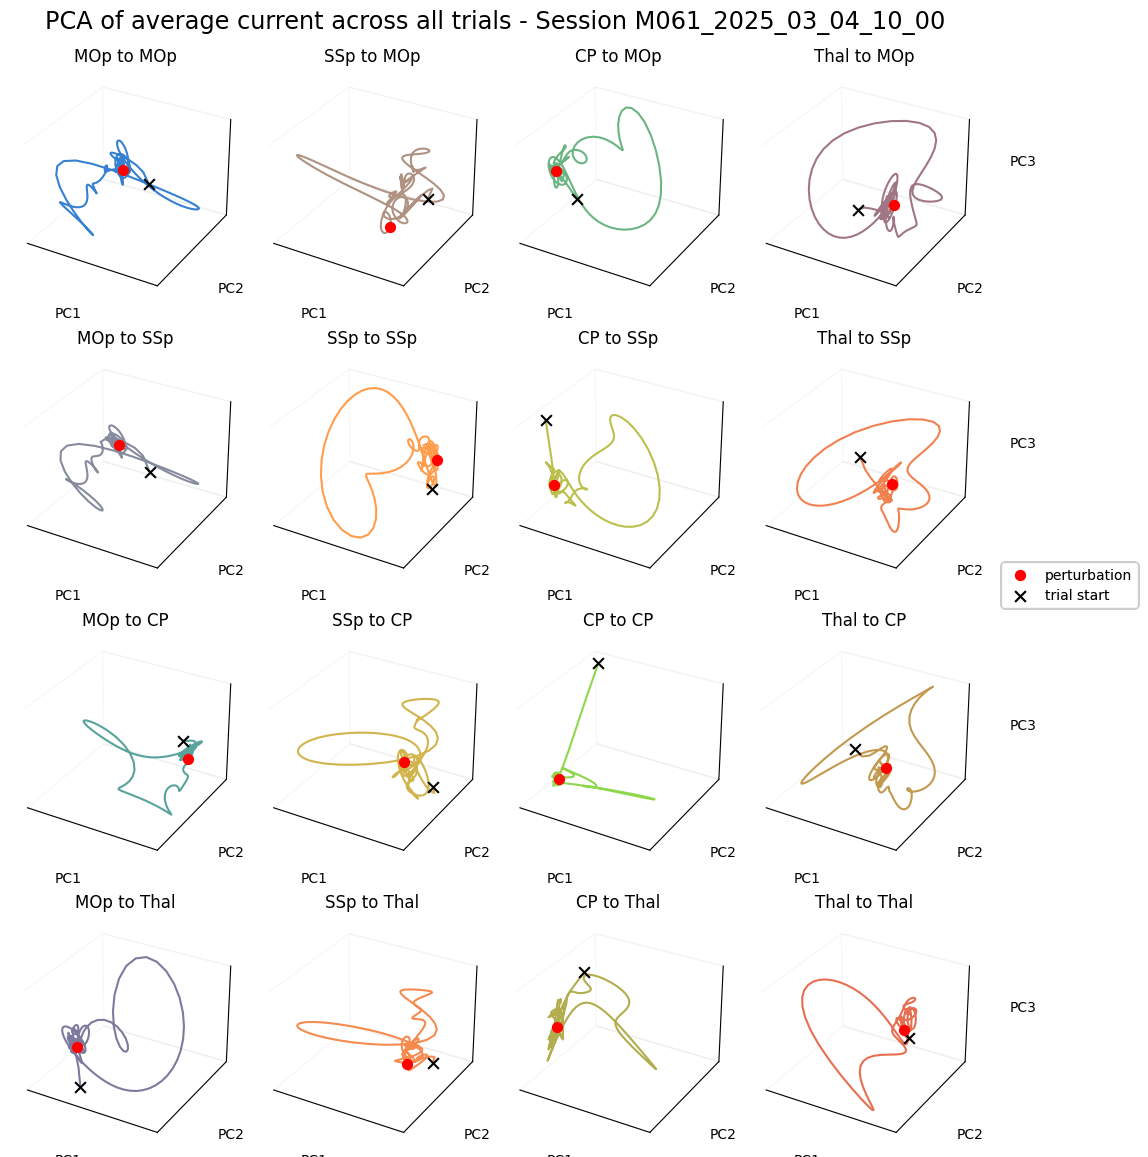

In [54]:
pca_current_fig = plot_pca_currents(currents0, current_labels0, pyal_dict0['perturbation_time'], curbd_colors, 'M061_2025_03_04_10_00')

In [55]:
curbd_arr1, curbd_labels1 = curbd.computeCURBD(rnn_model1)
n_regions1 = curbd_arr1.shape[0]
currents1, current_labels1 = curbdz.format_curbd_output(curbd_arr1, curbd_labels1, n_regions1, pyal_dict1['reset_points'])

In [56]:
brain_area_colors = {
    'MOp': "#3681D2",
    'SSp': "#ff9d4d",
    'CP': "#8ed74d",
    'VAL': '#e76f51',
    'all': '#bbbbbb'
}

curbd_colors = generate_directional_colors(brain_area_colors)

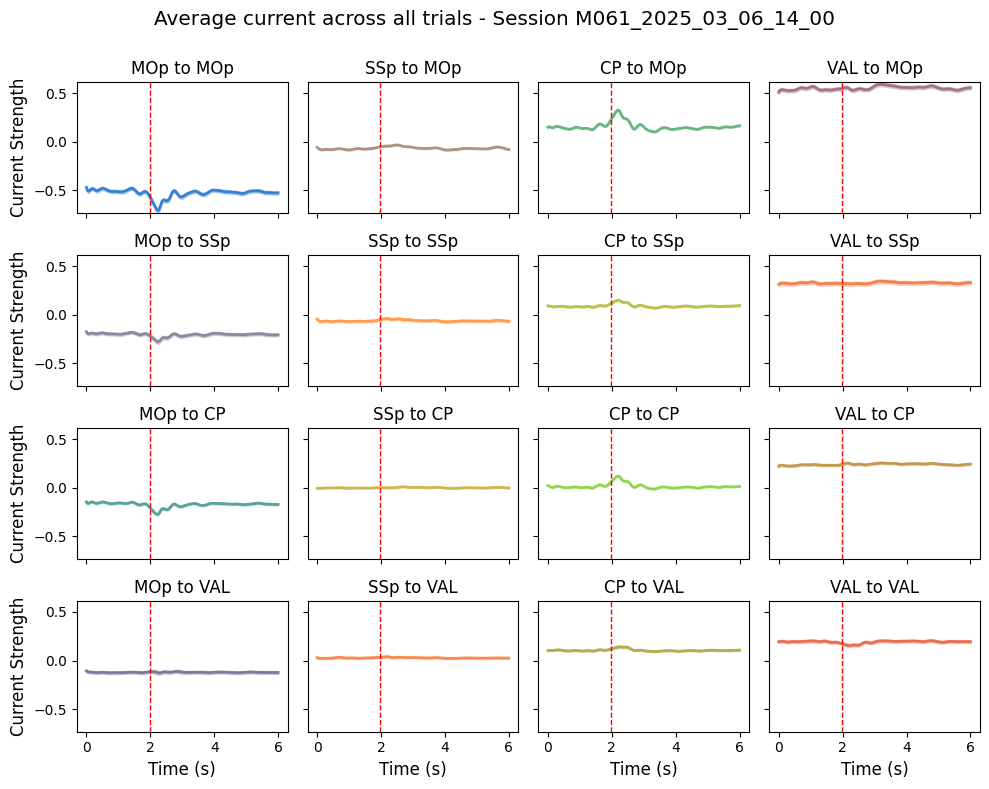

In [57]:
currents_fig = plot_currents_by_region(currents1, current_labels1, pyal_dict1['perturbation_time_sec'], curbd_colors, BIN_SIZE, rnn_model1['params']['dtFactor'], 'M061_2025_03_06_14_00')

/tmp/ipykernel_2729688/1768986960.py:73: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


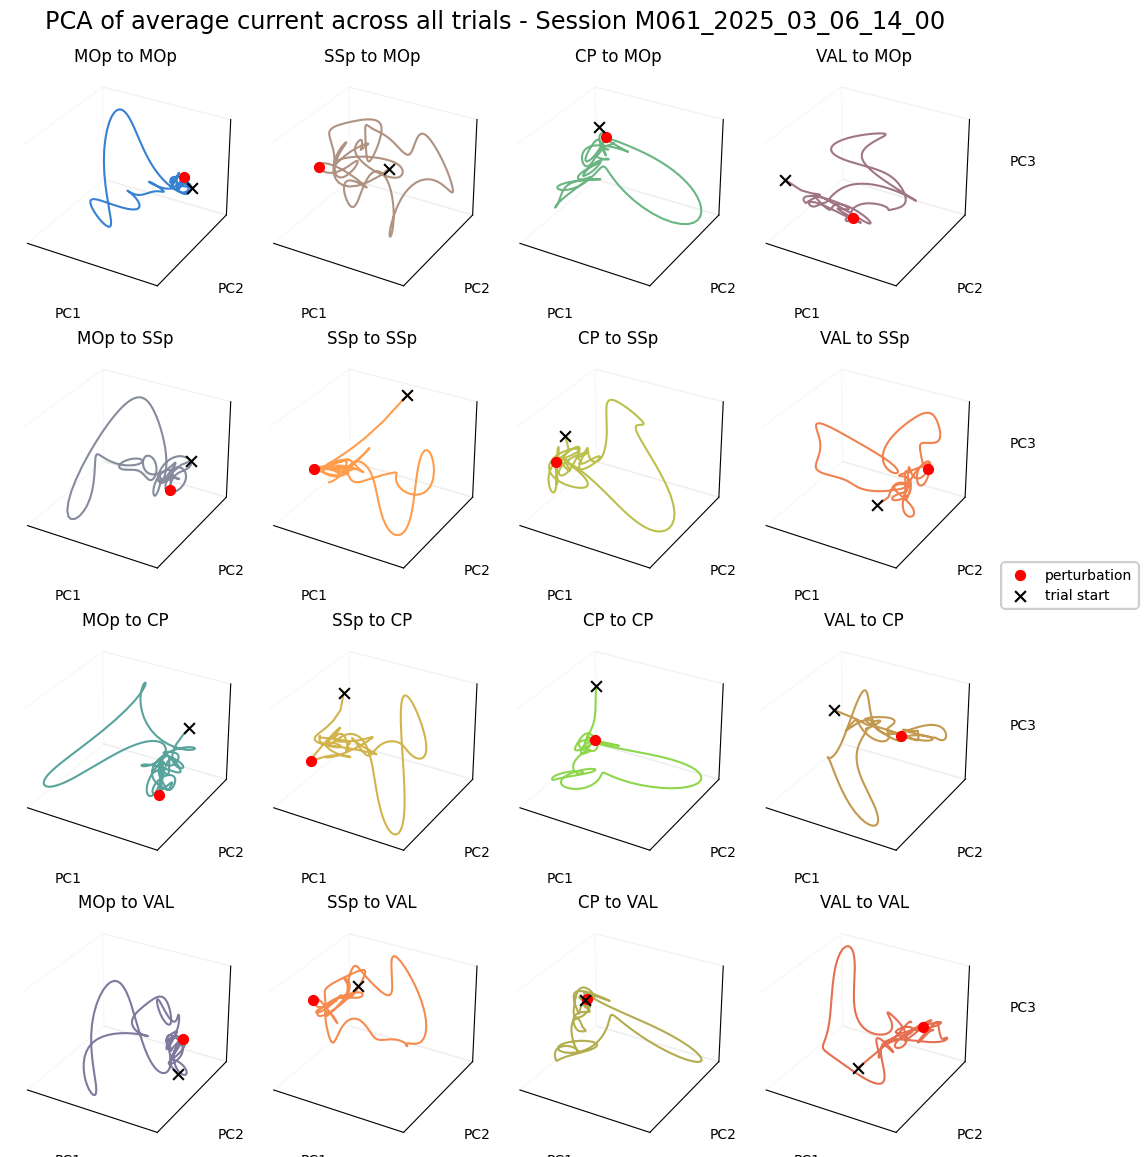

In [58]:
pca_current_fig = plot_pca_currents(currents1, current_labels1, pyal_dict1['perturbation_time'], curbd_colors, 'M061_2025_03_06_14_00')